In [63]:
from sklearn.datasets import make_classification

In [64]:
X,y = make_classification(n_samples=100, n_features=4,n_classes=2)

In [65]:
X.shape

(100, 4)

In [66]:
import numpy as np

In [67]:
np.unique(y)

array([0, 1])

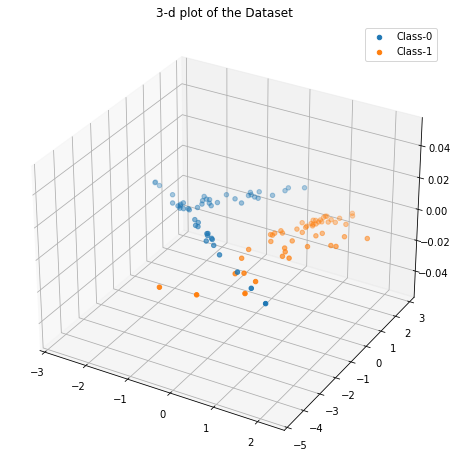

In [68]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-d plot of the Dataset")
for i, target_name in zip([0, 1], ['Class-0','Class-1']):
    ax.scatter(X[y == i, 0], X[y == i, 1],
                label = target_name)
plt.legend(loc='best')
plt.show() 

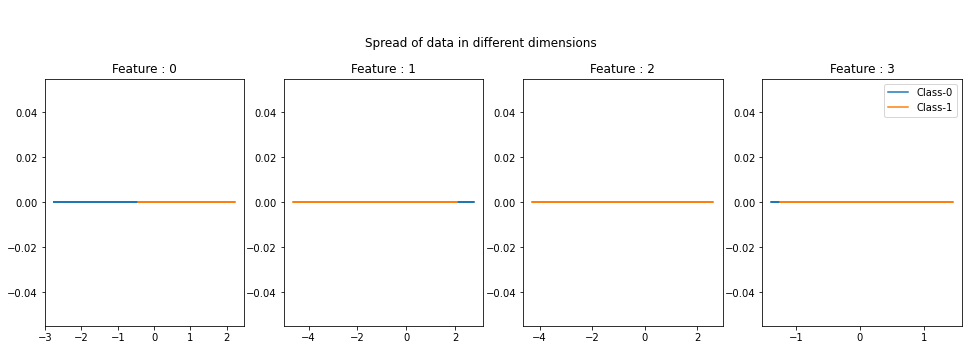

In [69]:
fig = plt.figure(figsize=(25, 10))
fig.suptitle("\n\nSpread of data in different dimensions" )

# Plot results
for j in range(4):
    ax = fig.add_subplot(2, 6, 2 + j + (j >3))
    for i, target_name in zip([0, 1],  ['Class-0','Class-1']):
        ax.set_title("Feature : %s" %(j))
        ax.plot(X[y == i, j],np.zeros_like(X[y == i, j]),label=target_name)
plt.legend(loc='best')
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda1 = LDA(n_components=1) 

In [72]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')

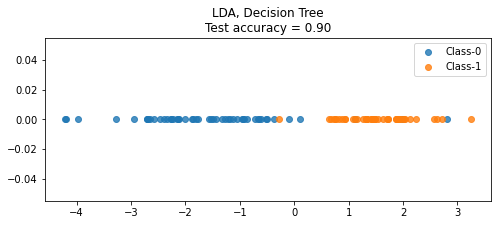

In [73]:
# Fit the method's model
lda1.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda1.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda1.transform(X_test), y_test)
X_1 = lda1.transform(X)
plt.figure(figsize=(8,3))
for i, target_name in zip([0, 1],  ['Class-0','Class-1']):
    plt.scatter(X_1[y == i, 0],np.zeros_like(X[y == i, j]), alpha=.8,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()